In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [22]:
# Read the data (replace 'data.csv' with your actual file name)
df = pd.read_csv('./data/Advertising.csv')

In [23]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [25]:
df = df.drop(columns=['Unnamed: 0'])

In [26]:
X = df.drop(columns=['Sales'])
y = df[['Sales']]

In [27]:
X.head()
y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160, 1), (40, 1))

In [29]:
# Choose the degree of the polynomial
degree = 3

# Create polynomial features
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_poly)



In [30]:
# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.29456840913088955


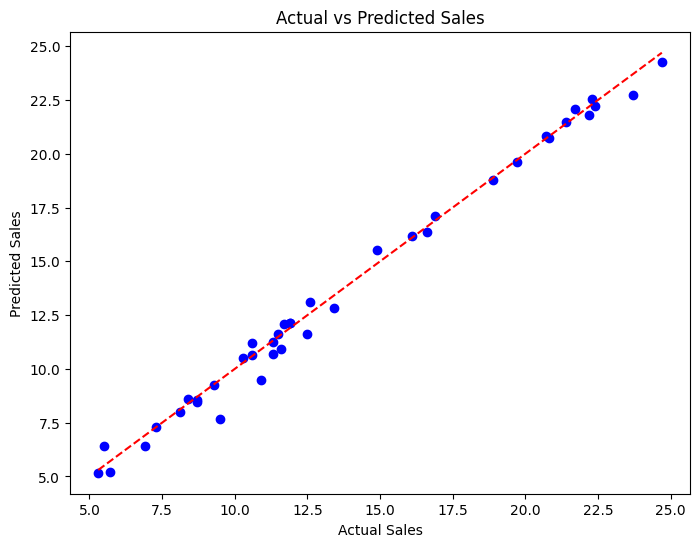

In [37]:
# Plot actual vs. predicted sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test['Sales']), max(y_test['Sales'])], [min(y_test['Sales']), max(y_test['Sales'])], color='red', linestyle='--')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()


In [41]:
# Create a DataFrame to compare y_test and y_pred
comparison_df = pd.DataFrame({'Actual Sales': y_test['Sales'].values, 'Predicted Sales': y_pred.flatten()})

# Display the comparison DataFrame
print(comparison_df)

    Actual Sales  Predicted Sales
0           16.9        17.112485
1           22.4        22.225458
2           21.4        21.480136
3            7.3         7.291943
4           24.7        24.250903
5           12.6        13.128255
6           22.3        22.539738
7            8.4         8.605189
8           11.5        11.623239
9           14.9        15.527040
10           9.5         7.678754
11           8.7         8.545474
12          11.9        12.155219
13           5.3         5.172853
14          10.3        10.501935
15          11.7        12.095227
16           5.5         6.405264
17          16.6        16.360975
18          11.3        11.227320
19          18.9        18.761036
20          19.7        19.607762
21          12.5        11.628973
22          10.9         9.493112
23          22.2        21.783765
24           9.3         9.257080
25           8.1         7.977186
26          21.7        22.103149
27          13.4        12.812494
28          10